In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datasets
from collections import Counter

In [2]:
DATASET_PATH = "rabuahmad/climatecheck"

In [3]:
climate_dataset = datasets.load_dataset(DATASET_PATH)

In [4]:
climate_dataset = climate_dataset["train"]
climate_dataset_df = climate_dataset.to_pandas()

In [5]:
climate_dataset_df.head(8)

,claim,abstract,abstract_id,claim_id,annotation
0,"Turns out, species that can adapt easily to di...",Welcome to the city Human populations are shif...,31710,0,Not Enough Information
1,"Turns out, species that can adapt easily to di...",Local adaptation of plant species is a central...,50203,0,Supports
2,"Turns out, species that can adapt easily to di...",BACKGROUND Differences among species in their ...,43775,0,Not Enough Information
3,"Turns out, species that can adapt easily to di...",Being faced with unknown environments is a con...,217080,0,Supports
4,"Turns out, species that can adapt easily to di...",Extreme marine environments cover more than 50...,105918,0,Not Enough Information
5,Let's not forget the overwhelming evidence for...,Summary \n1. The evidence for anthropogenicall...,29893,5,Supports
6,Let's not forget the overwhelming evidence for...,Apart from the current human-induced climate c...,201054,5,Not Enough Information
7,Let's not forget the overwhelming evidence for...,A Bayesian analysis of the evidence for human-...,13588,5,Not Enough Information


In [6]:
print("Missing Values:\n", climate_dataset_df.isnull().sum())
print("\nDuplicate Rows:", climate_dataset_df.duplicated().sum())
print("\nAnnotation Distribution:\n", climate_dataset_df['annotation'].value_counts())
print("\n\nNumber of unique claims:", len(climate_dataset_df['claim_id'].unique()))

Missing Values:
 claim          0
abstract       0
abstract_id    0
claim_id       0
annotation     0
dtype: int64

Duplicate Rows: 0

Annotation Distribution:
 annotation
Not Enough Information    457
Supports                  446
Refutes                   241
Name: count, dtype: int64


Number of unique claims: 252


/tmp/ipykernel_3663491/613802436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=climate_dataset_df['annotation'], palette="viridis")


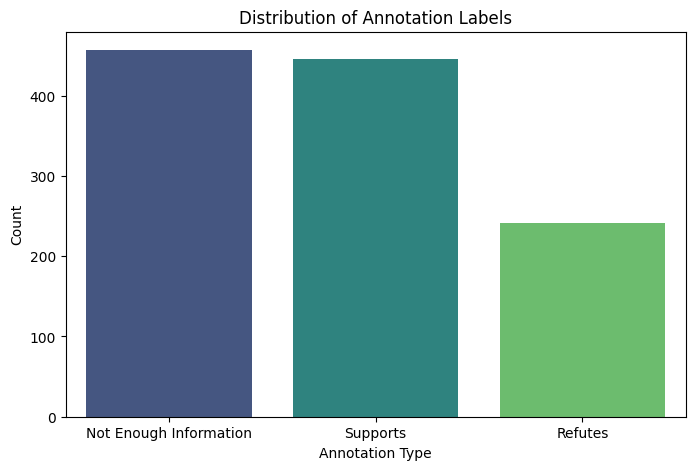

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=climate_dataset_df['annotation'], palette="viridis")
plt.title("Distribution of Annotation Labels")
plt.xlabel("Annotation Type")
plt.ylabel("Count")
# plt.show()
plt.savefig('./dataset_distribution.png')

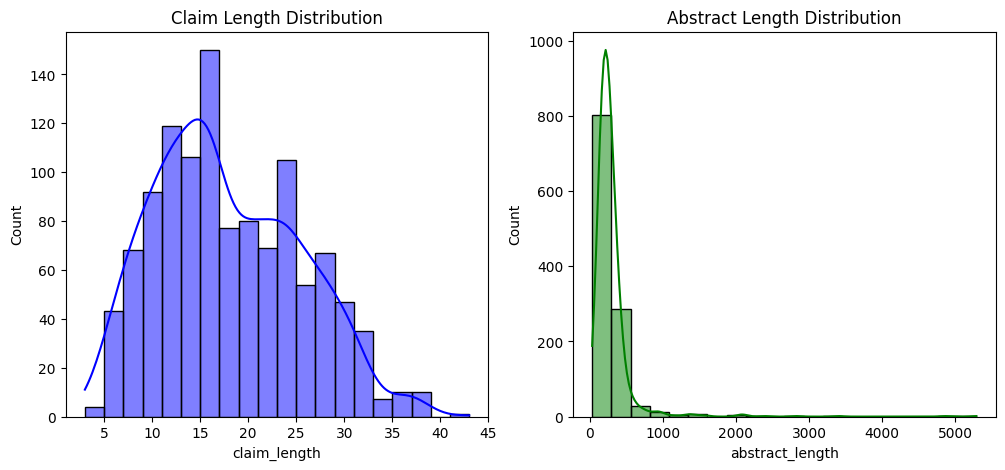

In [212]:
climate_dataset_df['claim_length'] = climate_dataset_df['claim'].apply(lambda x: len(str(x).split()))
climate_dataset_df['abstract_length'] = climate_dataset_df['abstract'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 5))

# Claim Length Distribution
plt.subplot(1, 2, 1)
sns.histplot(climate_dataset_df['claim_length'], bins=20, kde=True, color='blue')
plt.title("Claim Length Distribution")

# Abstract Length Distribution
plt.subplot(1, 2, 2)
sns.histplot(climate_dataset_df['abstract_length'], bins=20, kde=True, color='green')
plt.title("Abstract Length Distribution")

plt.show()

In [213]:
print(f"Maximum claim length: {max(climate_dataset_df['claim_length'])}")
print(f"Minimum claim length: {min(climate_dataset_df['claim_length'])}")
print(f"average claim length: {sum(climate_dataset_df['claim_length'])/ len(climate_dataset_df['claim_length'])}")
print(f"Maximum abstract length: {max(climate_dataset_df['abstract_length'])}")
print(f"Minimum abstract length: {min(climate_dataset_df['abstract_length'])}")
print(f"average abstract length: {sum(climate_dataset_df['abstract_length'])/ len(climate_dataset_df['abstract_length'])}")

Maximum claim length: 43
Minimum claim length: 3
average claim length: 17.759615384615383
Maximum abstract length: 5290
Minimum abstract length: 32
average abstract length: 289.13024475524475


In [215]:
sum(climate_dataset_df['abstract_length'] > 1000)

19

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mahmoud.fathallah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


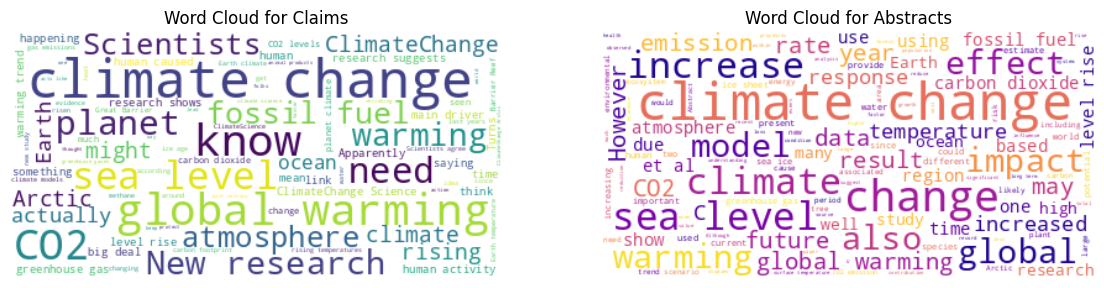

In [216]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all claims into one text
claims_text = " ".join(climate_dataset_df['claim'].astype(str))
abstracts_text = " ".join(climate_dataset_df['abstract'].astype(str))

# Generate word clouds
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
wc1 = WordCloud(stopwords=stop_words, background_color="white", colormap="viridis").generate(claims_text)
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Claims")

plt.subplot(1, 2, 2)
wc2 = WordCloud(stopwords=stop_words, background_color="white", colormap="plasma").generate(abstracts_text)
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Abstracts")

plt.show()

# Analysis of abstracts data

In [217]:
ABSTRACTS_DATA_PATH = "rabuahmad/climatecheck_publications_corpus"

In [218]:
abstracts_dataset = datasets.load_dataset(ABSTRACTS_DATA_PATH)

In [219]:
abstracts_dataset = abstracts_dataset["train"]
abstracts_dataset_df = abstracts_dataset.to_pandas()

In [220]:
abstracts_dataset_df.head(5)

,s2orc_id,doi,title,abstract,s2orc_url,url,s2orc_fieldsOfStudy,s2FieldsOfStudy,citation_count,source,openalex_id,openalex_topics,openalex_keywords,openalex_concepts,openalex_topic_id,title_lowered,abstract_lowered,abstract_id
0,00013b61c08068ed60270418d7c28a8b319a25db,https://doi.org/10.3390/w12051371,Exploring Spatiotemporal Relations between Soi...,An understanding of streamflow variability and...,https://www.semanticscholar.org/paper/00013b61...,https://www.mdpi.com/2073-4441/12/5/1371/pdf?v...,[Environmental Science],"[{'category': 'Environmental Science', 'source...",19.0,s2orc,None,None,None,None,None,exploring spatiotemporal relations between soi...,an understanding of streamflow variability and...,0
1,000148e625b73f9664a9db907ebede5643163e04,https://doi.org/10.1029/2001JD900129,Annual net snow accumulation over southern Gre...,As part of NASA's Program for Arctic Regional ...,https://www.semanticscholar.org/paper/000148e6...,https://onlinelibrary.wiley.com/doi/pdfdirect/...,[Geology],"[{'category': 'Geology', 'source': 'external'}...",46.0,s2orc,None,None,None,None,None,annual net snow accumulation over southern gre...,as part of nasa's program for arctic regional ...,1
2,00021d4f9b01491054b2d7c957b119785a3f8148,https://doi.org/10.3389/feart.2020.00282,Response of Westerly Jet Over the Northern Hem...,The westerly jet (WJ) in the upper troposphere...,https://www.semanticscholar.org/paper/00021d4f...,https://www.frontiersin.org/articles/10.3389/f...,[Geology],"[{'category': 'Geology', 'source': 'external'}...",26.0,s2orc,None,None,None,None,None,response of westerly jet over the northern hem...,the westerly jet (wj) in the upper troposphere...,2
3,00027e833457ec35b57b745c097b45f5ee717c5e,https://doi.org/10.1002/EET.1795,Collaborative Governance for Climate Change Ad...,Increasing climate change impacts are a major ...,https://www.semanticscholar.org/paper/00027e83...,https://onlinelibrary.wiley.com/doi/pdfdirect/...,[Political Science],"[{'category': 'Political Science', 'source': '...",113.0,s2orc,None,None,None,None,None,collaborative governance for climate change ad...,increasing climate change impacts are a major ...,3
4,00028b0ac79f1c61046d887fddd665c2bebfdb43,https://doi.org/10.1029/2019JD030329,Comparing Surface and Stratospheric Impacts of...,Geoengineering with stratospheric sulfate aero...,https://www.semanticscholar.org/paper/00028b0a...,https://iu.tind.io/record/2928/files/5756_Comp...,"[Geology, Environmental Science]","[{'category': 'Geology', 'source': 'external'}...",65.0,s2orc,None,None,None,None,None,comparing surface and stratospheric impacts of...,geoengineering with stratospheric sulfate aero...,4


In [221]:
print(f"missing values in the data:\n\n{abstracts_dataset_df.isnull().sum()}")

missing values in the data:

s2orc_id               338063
doi                         0
title                       0
abstract                    0
s2orc_url              338063
url                         0
s2orc_fieldsOfStudy    342373
s2FieldsOfStudy        338063
citation_count              0
source                      0
openalex_id             56206
openalex_topics         56206
openalex_keywords       56206
openalex_concepts       56206
openalex_topic_id       56206
title_lowered               0
abstract_lowered            0
abstract_id                 0
dtype: int64


In [222]:
openalex_topics_count = len(abstracts_dataset_df) - abstracts_dataset_df['openalex_topics'].isnull().sum()
s2fieldsofstudy_count = len(abstracts_dataset_df) - abstracts_dataset_df['s2FieldsOfStudy'].isnull().sum()

print(f"Total number of abstracts: {len(abstracts_dataset_df)}")
print(f"Number of abstracts with s2FieldsOfStudy: {s2fieldsofstudy_count}")
print(f"Number of abstracts with openalex_topics: {openalex_topics_count}")
print(f"number of abstracts without either s2FieldsOfStudy nor openalex_topics: {len(abstracts_dataset_df) - (s2fieldsofstudy_count + openalex_topics_count)}")

Total number of abstracts: 394269
Number of abstracts with s2FieldsOfStudy: 56206
Number of abstracts with openalex_topics: 338063
number of abstracts without either s2FieldsOfStudy nor openalex_topics: 0


In [223]:
def parse_s2fieldofstudy(objects):
    if objects is None:
        return None
    res = set()
    for obj in objects:
        res.add(obj['category'])
    return list(res)

def parse_openalex_topics(objects):
    if objects is None:
        return None
    res = set()
    for obj in objects:
        res.add(obj['field']['display_name'])
    return list(res)

In [224]:
abstracts_dataset_df['field_of_study1'] = abstracts_dataset_df['s2FieldsOfStudy'].apply(lambda x: parse_s2fieldofstudy(x))
abstracts_dataset_df['field_of_study2'] = abstracts_dataset_df['openalex_topics'].apply(lambda x: parse_openalex_topics(x))

In [225]:
abstracts_dataset_df['merged_field_of_study'] = abstracts_dataset_df["field_of_study1"].combine_first(abstracts_dataset_df["field_of_study2"])

In [226]:
print(f"Number of abstracts that have no field of study: {abstracts_dataset_df['merged_field_of_study'].isnull().sum()}")

Number of abstracts that have no field of study: 0


In [227]:
unique_field_of_study = set()
field_of_study_list = []
for field in abstracts_dataset_df['merged_field_of_study']:
    unique_field_of_study.update(field)
    field_of_study_list.extend(field)
print(f"Number of unique fields of study: {len(unique_field_of_study)}")

Number of unique fields of study: 41


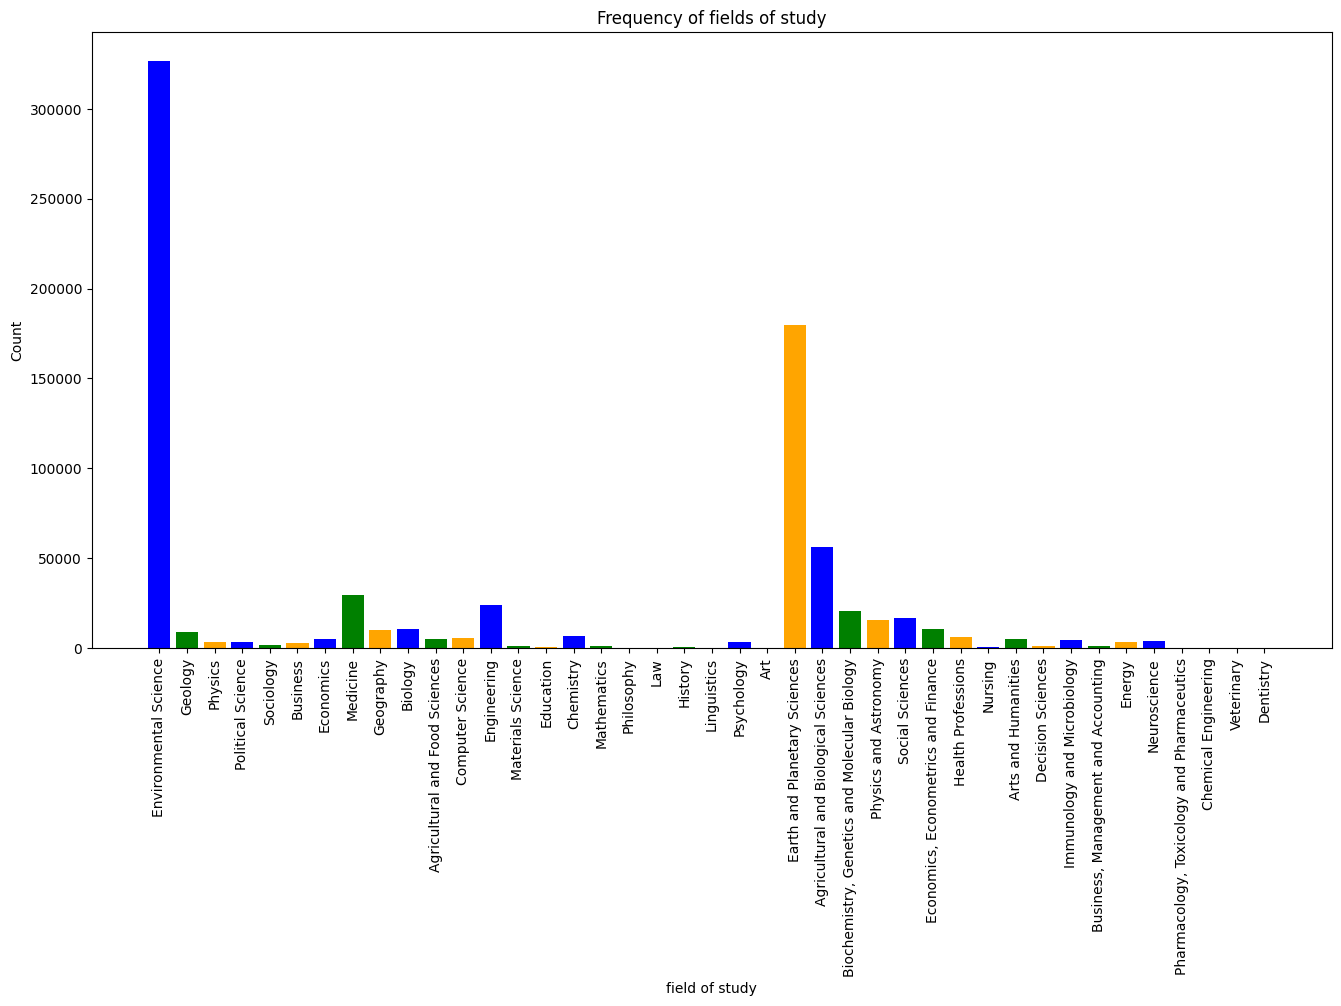

In [228]:
counter = Counter(field_of_study_list)

labels, counts = zip(*counter.items())
plt.figure(figsize=(16, 8))
plt.bar(labels, counts, color=['blue', 'green', 'orange'])

plt.xlabel("field of study")
plt.ylabel("Count")
plt.title("Frequency of fields of study")
plt.xticks(rotation=90)

plt.show()

342373


/tmp/ipykernel_168178/3581558719.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Field", data=fields_df.head(10), palette="viridis")


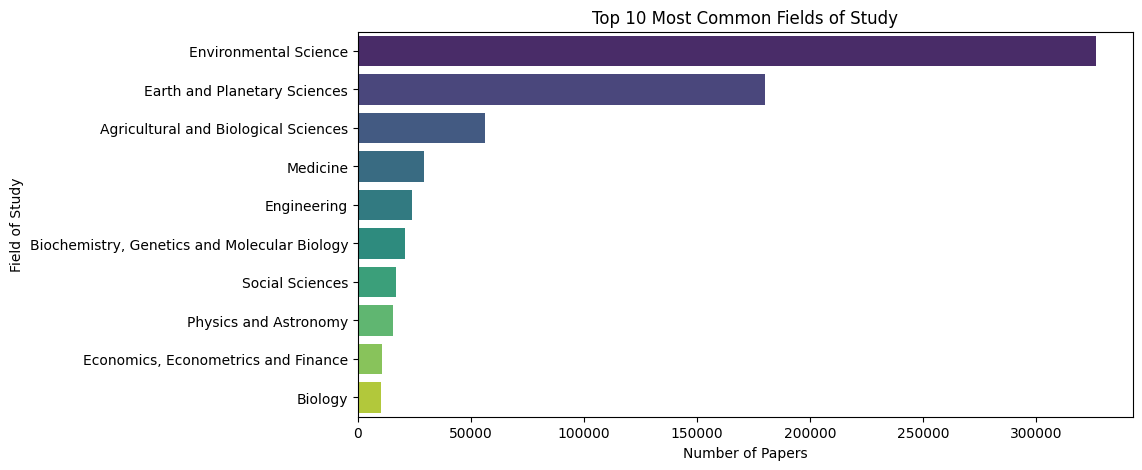

In [229]:
print(abstracts_dataset_df['s2orc_fieldsOfStudy'].isnull().sum())
field_counts = Counter(field_of_study_list)

fields_df = pd.DataFrame(field_counts.items(), columns=["Field", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Count", y="Field", data=fields_df.head(10), palette="viridis")
plt.title("Top 10 Most Common Fields of Study")
plt.xlabel("Number of Papers")
plt.ylabel("Field of Study")
plt.show()

In [230]:
abstracts_dataset_df['abstract_length'] = abstracts_dataset_df['abstract'].apply(lambda x: len(str(x).split()))
print(f"Maximum abstract length: {max(abstracts_dataset_df['abstract_length'])}")
print(f"Minimum abstract length: {min(abstracts_dataset_df['abstract_length'])}")
print(f"Average abstract length: {sum(abstracts_dataset_df['abstract_length'])/ len(abstracts_dataset_df['abstract_length'])}")
print(f"Number of abstracts with length <= 500: {sum(abstracts_dataset_df['abstract_length'] <= 500)}")

Maximum abstract length: 6818
Minimum abstract length: 1
Average abstract length: 240.92530734092713
Number of abstracts with length <= 500: 388455


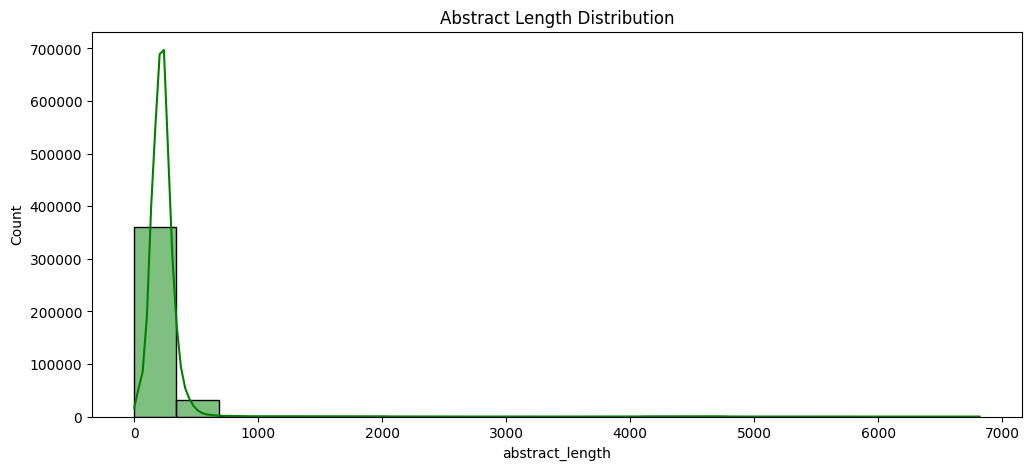

In [231]:
plt.figure(figsize=(12, 5))

# Abstract Length Distribution
sns.histplot(abstracts_dataset_df['abstract_length'], bins=20, kde=True, color='green')
plt.title("Abstract Length Distribution")

plt.show()

In [233]:
final_df = abstracts_dataset_df[['title', 'abstract', 'abstract_id', 'merged_field_of_study']]

In [234]:
final_df

,title,abstract,abstract_id,merged_field_of_study
0,Exploring Spatiotemporal Relations between Soi...,An understanding of streamflow variability and...,0,[Environmental Science]
1,Annual net snow accumulation over southern Gre...,As part of NASA's Program for Arctic Regional ...,1,"[Environmental Science, Geology]"
2,Response of Westerly Jet Over the Northern Hem...,The westerly jet (WJ) in the upper troposphere...,2,"[Physics, Environmental Science, Geology]"
3,Collaborative Governance for Climate Change Ad...,Increasing climate change impacts are a major ...,3,"[Political Science, Environmental Science, Soc..."
4,Comparing Surface and Stratospheric Impacts of...,Geoengineering with stratospheric sulfate aero...,4,"[Environmental Science, Geology]"
...,...,...,...,...
394264,Estimating Herbage Standing Crop from Rainfall...,To help local Niger government authorities and...,394264,"[Environmental Science, Agricultural and Biolo..."
394265,Refinement and validation of the PUTU wheat cr...,A submodel for simulating daily grain growth w...,394265,[Agricultural and Biological Sciences]
394266,Temperature response of dry matter accumulatio...,Studies were conducted to investigate whether ...,394266,[Agricultural and Biological Sciences]
394267,Comparison of two soya bean simulation models ...,CR Climate Research Contact the journal Facebo...,394267,[Agricultural and Biological Sciences]


In [ ]:
final_df.to_parquet("./climatecheck_abstracts.parquet", index=False)